<a href="https://colab.research.google.com/github/ammusin/Respiratory_disease_detection/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L1L2, L1, L2
from tensorflow.keras.optimizers import SGD, Adamax
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkarmanohardalvi/lungs-disease-dataset-4-types")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lungs-disease-dataset-4-types


In [ ]:
train_gen = ImageDataGenerator(rotation_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True,
                               brightness_range = [0.8, 1.5],
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               rescale = 1/255
                               )

val_gen = ImageDataGenerator(rotation_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True,
                               brightness_range = [0.8, 1.5],
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               rescale = 1/255
                               )

test_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
import os

base_path = '/kaggle/input/lungs-disease-dataset-4-types'

print(os.listdir(base_path))


['Lung Disease Dataset']


In [ ]:
print(os.listdir(os.path.join(base_path, 'Lung Disease Dataset')))


['val', 'test', 'train']


In [ ]:
train_data = train_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'train'),
    target_size=(128, 128),
    color_mode="grayscale",
    batch_size=128,
    shuffle=True
)

val_data = train_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'val'),
    target_size=(128, 128),
    color_mode="grayscale",
    batch_size=128,
    shuffle=True
)

test_data = train_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'test'),
    target_size=(128, 128),
    color_mode="grayscale",
    batch_size=128,
    shuffle=True
)


Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


In [ ]:
train_classes = train_data.class_indices
train_classes

{'Bacterial Pneumonia': 0,
 'Corona Virus Disease': 1,
 'Normal': 2,
 'Tuberculosis': 3,
 'Viral Pneumonia': 4}

In [ ]:
test_classes = test_data.class_indices
test_classes

{'Bacterial Pneumonia': 0,
 'Corona Virus Disease': 1,
 'Normal': 2,
 'Tuberculosis': 3,
 'Viral Pneumonia': 4}

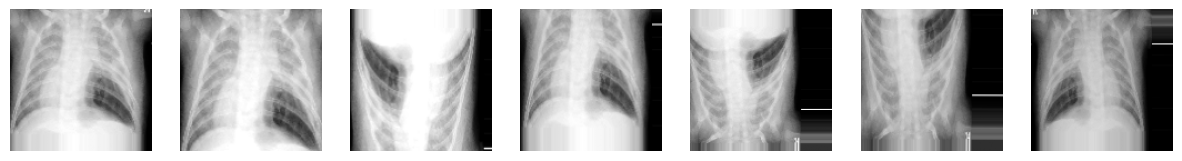

In [ ]:
random_arr = np.random.randint(len(train_data))
random_img = np.random.randint(len(train_data[random_arr][0]))
images = [train_data[random_arr][0][random_img] for i in range(7)]

fig, ax = plt.subplots(ncols=7, figsize=(15, 15))

for i in range(7):
  ax[i].imshow(images[i], cmap="gray")
  ax[i].set_axis_off()

In [ ]:
model = Sequential([
    InputLayer(shape=np.shape(train_data[0][0][0])),

    Conv2D(filters=32, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),

    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    Conv2D(filters=64, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    Conv2D(filters=128, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    Conv2D(filters=256, kernel_size=(3,3), activation="relu", kernel_initializer="he_normal", padding="same"),
    MaxPool2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),

    Dense(5, activation="softmax"),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,172,965 (4.47 MB)

 Trainable params: 1,172,965 (4.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
early_stopping = EarlyStopping(min_delta=0.001, restore_best_weights=True, monitor="val_accuracy", patience=15)
history = model.fit(x=train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[early_stopping]
                    )


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.2428 - loss: 1.7870 - val_accuracy: 0.3943 - val_loss: 1.3963
Epoch 2/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.4605 - loss: 1.2827 - val_accuracy: 0.4906 - val_loss: 1.2612
Epoch 3/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5305 - loss: 1.1661 - val_accuracy: 0.4712 - val_loss: 1.2215
Epoch 4/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5212 - loss: 1.1259 - val_accuracy: 0.5263 - val_loss: 1.0881
Epoch 5/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6000 - loss: 1.0073 - val_accuracy: 0.6111 - val_loss: 1.0013
Epoch 6/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6386 - loss: 0.8871 - val_accuracy: 0.6533 - val_loss: 0.8795
Epoch 7/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6356 - loss: 0.8854 - val_accuracy: 0.6359 - val_loss: 0.9409
Epoch 8/80
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6656 - loss: 0.8041 - val_accuracy: 0.6562 - val_loss

In [ ]:
model.save("vgg16_model.keras")


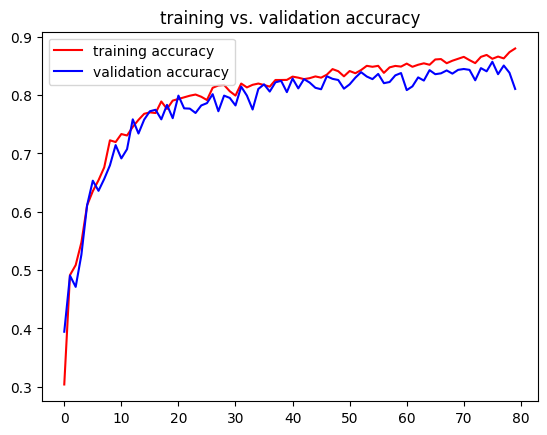

In [ ]:
plt.title("training vs. validation accuracy")
plt.plot(history.history["accuracy"], "r", label="training accuracy")
plt.plot(history.history["val_accuracy"], "b", label="validation accuracy")
plt.legend()

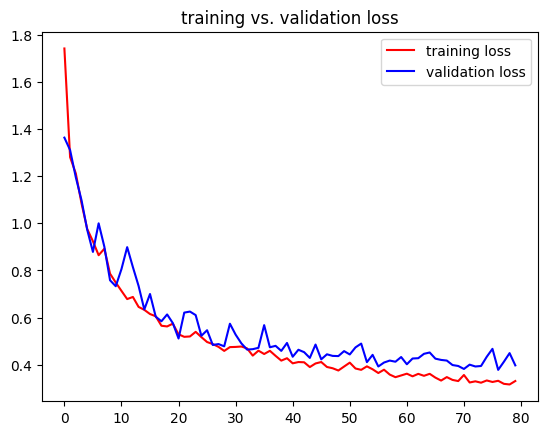

In [ ]:
plt.title("training vs. validation loss")
plt.plot(history.history["loss"], "r", label="training loss")
plt.plot(history.history["val_loss"], "b", label="validation loss")
plt.legend()

In [ ]:
random_arr = np.random.randint(len(test_data))
random_img = np.random.randint(len(test_data[random_arr][0]))

In [ ]:
label = list(test_classes.keys())[np.argmax(test_data[random_arr][1][random_img])]
prediction = list(test_classes.keys())[np.argmax(model.predict(np.array([test_data[random_arr][0][random_img]])))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


expected value: Bacterial Pneumonia
prediction: Tuberculosis


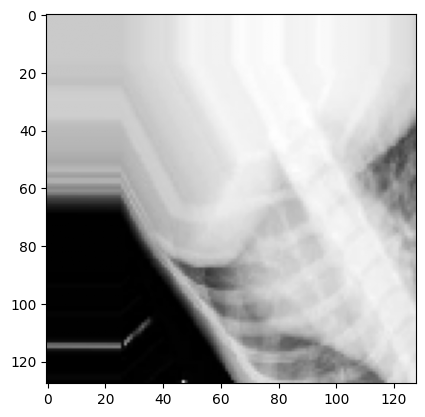

In [ ]:
print(f"expected value: {label}")
print(f"prediction: {prediction}")
plt.imshow(test_data[random_arr][0][random_img], cmap="gray")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: Viral Pneumonia


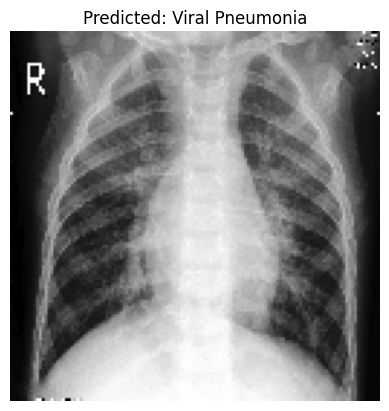

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# 1. Load your image
img_path = '/content/vp.jpeg'  # 🔥 Change this to your image path
img = image.load_img(img_path, target_size=(128, 128), color_mode="grayscale")

# 2. Convert to array
img_array = image.img_to_array(img)

# 3. Normalize (because you used rescale=1/255 while training)
img_array = img_array / 255.0

# 4. Expand dimensions (model expects batch of images, even if it's just one)
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 128, 128, 1)

# 5. Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# 6. Map the prediction back to class name
class_labels = list(test_data.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

# 7. Optionally, visualize the image too
import matplotlib.pyplot as plt

plt.imshow(img_array[0].squeeze(), cmap='gray')
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model saved as 'lung_disease_cnn_model.h5'
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8661 - loss: 0.3490
Test Accuracy: 85.58%
Test Loss: 0.3639
Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.24      0.21      0.22       403
Corona Virus Disease       0.18      0.19      0.18       407
              Normal       0.19      0.21      0.20       404
        Tuberculosis       0.18      0.18      0.18       408
     Viral Pneumonia       0.21      0.21      0.21       403

            accuracy                           0.20      2025
           macro avg       0.20      0.20      0.20      2025
        weighted avg       0.20      0.20      0.20      2025



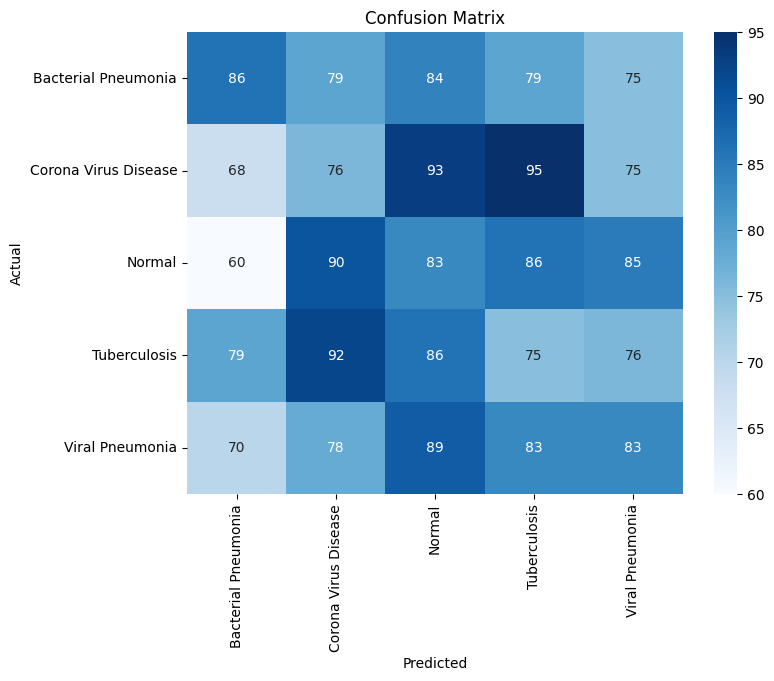

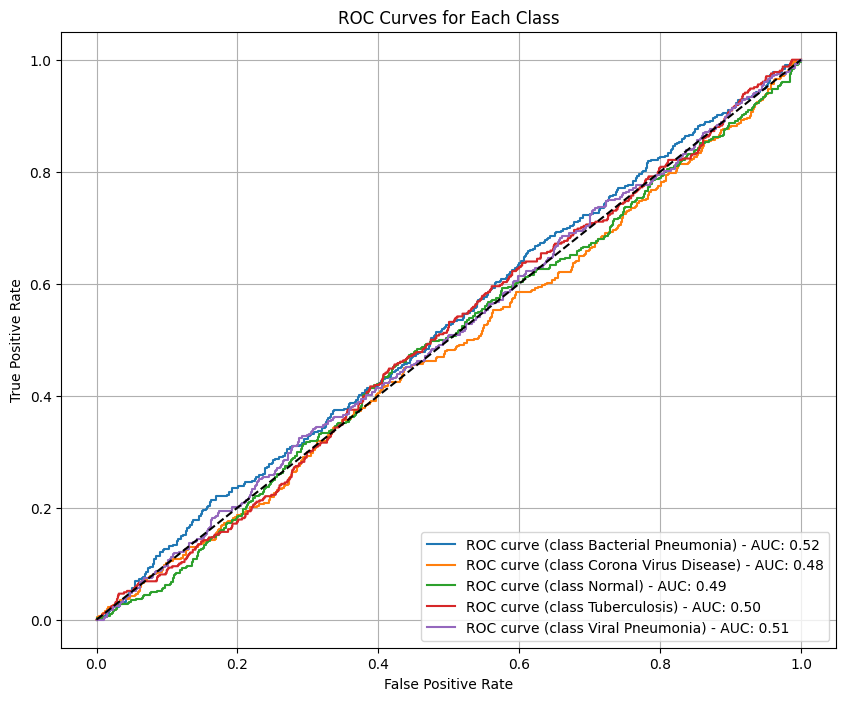

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # for saving
import os

# Save the model
model.save("lung_disease_cnn_model.h5")
print("Model saved as 'lung_disease_cnn_model.h5'")

# Get predictions
test_data.reset()
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Calculate accuracy and loss on test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (Multi-class)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

# Binarize labels
y_true_bin = label_binarize(y_true, classes=list(range(len(class_labels))))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f"ROC curve (class {class_labels[i]}) - AUC: {roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Class: Viral Pneumonia

Doctor's Prescription:
⚠ You may be experiencing symptoms of viral pneumonia.
- Please see your healthcare provider as soon as possible for confirmation and treatment.
- You may need antiviral medications, rest, and supportive care like hydration.
- Keep track of your breathing and oxygen levels, especially if you notice increased shortness of breath.
- Avoid taking antibiotics unless prescribed by a doctor, as they are ineffective against viral infections.
- Isolate yourself to prevent spreading the virus, and practice good hygiene (wash hands, wear a mask).


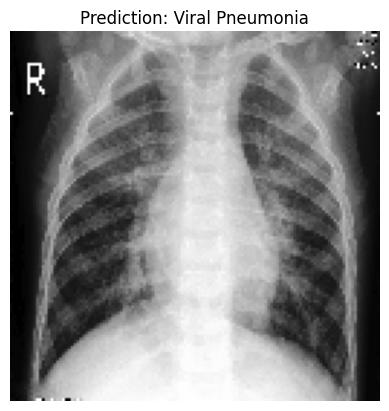

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your image
img_path = '/content/vp.jpeg'  # Change to your image path
img = image.load_img(img_path, target_size=(128, 128), color_mode="grayscale")

# 2. Convert to array
img_array = image.img_to_array(img)

# 3. Normalize (rescale like training)
img_array = img_array / 255.0

# 4. Expand dimensions for batch
img_array = np.expand_dims(img_array, axis=0)  # (1, 128, 128, 1)

# 5. Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# 6. Map prediction to class label
class_labels = list(test_data.class_indices.keys())
predicted_label = class_labels[predicted_class[0]].strip().title()  # Clean label
print(f"Predicted Class: {predicted_label}")

# 7. Detailed doctor-style prescriptions
prescriptions = {
    "Normal": (
        "✅ Your lung health is currently normal.\n"
        "- Continue maintaining a healthy lifestyle with regular exercise, at least 150 minutes of moderate-intensity activity per week.\n"
        "- Follow a balanced diet rich in fruits, vegetables, lean proteins, and whole grains to support overall health.\n"
        "- Avoid smoking and limit exposure to environmental pollutants, such as secondhand smoke and industrial fumes.\n"
        "- Stay current with vaccinations, especially for respiratory infections like the flu and COVID-19.\n"
        "- Consider scheduling an annual check-up to monitor your respiratory health, particularly if you have a family history of lung disease."
    ),
    "Viral Pneumonia": (
        "⚠ You may be experiencing symptoms of viral pneumonia.\n"
        "- Please see your healthcare provider as soon as possible for confirmation and treatment.\n"
        "- You may need antiviral medications, rest, and supportive care like hydration.\n"
        "- Keep track of your breathing and oxygen levels, especially if you notice increased shortness of breath.\n"
        "- Avoid taking antibiotics unless prescribed by a doctor, as they are ineffective against viral infections.\n"
        "- Isolate yourself to prevent spreading the virus, and practice good hygiene (wash hands, wear a mask)."
    ),
    "Bacterial Pneumonia": (
        "⚠ Bacterial pneumonia detected.\n"
        "- Immediate medical attention is required. You will likely be prescribed antibiotics for treatment.\n"
        "- Complete the full course of antibiotics, even if symptoms improve, to ensure complete recovery.\n"
        "- Drink plenty of fluids to stay hydrated, and avoid alcohol or smoking, which can impair recovery.\n"
        "- Get adequate rest and avoid strenuous activities until you feel fully recovered.\n"
        "- Your doctor may recommend a follow-up chest X-ray to monitor your progress and ensure complete recovery."
    ),
    "Corona Virus Disease": (
        "⚠ Your symptoms may be indicative of COVID-19.\n"
        "- If not already tested, please arrange for a COVID-19 test at your earliest convenience.\n"
        "- Isolate yourself from others to prevent spreading the infection. Monitor your oxygen levels with a pulse oximeter.\n"
        "- Rest, hydrate, and take over-the-counter medications like acetaminophen to manage fever or pain.\n"
        "- If you experience shortness of breath, chest pain, or confusion, seek emergency medical care immediately.\n"
        "- After recovering, consult your healthcare provider before resuming normal activities, especially if experiencing long-term symptoms like fatigue or shortness of breath."
    ),
    "Tuberculosis": (
        "⚠ You may have signs of tuberculosis (TB).\n"
        "- Please see a pulmonologist or TB specialist for further testing, including a chest X-ray and sputum test.\n"
        "- If confirmed, TB treatment involves a course of antibiotics over several months. Adherence to the treatment regimen is critical.\n"
        "- You will need to follow your doctor’s instructions carefully to prevent the spread of TB and ensure complete treatment.\n"
        "- Maintain good nutrition and regular rest during your treatment to support your immune system.\n"
        "- Inform your healthcare provider about any side effects from the medication. Isolation may be necessary until you are no longer contagious."
    )
}

# 8. Show prescription (default if label not found)
prescription = prescriptions.get(predicted_label, "No prescription available for this class.")
print(f"\nDoctor's Prescription:\n{prescription}")

# 9. Visualize the image
plt.imshow(img_array[0].squeeze(), cmap='gray')
plt.title(f"Prediction: {predicted_label}")
plt.axis('off')
plt.show()
